**Gathering**

In [67]:
import tweepy
import pandas as pd
import requests
import os
from PIL import Image
from io import BytesIO
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Gather the data from a website
#Save the data in a folder and dataframe
folder_name = 'image_prediction'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name) 
    
response = requests.get(url)
response.content
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
              file.write(response.content)
              os.listdir(folder_name)
            

In [3]:
#read the file created as dataframe
image_predection_df = pd.read_csv('image_prediction/image-predictions.tsv', sep = '\t')
image_predection_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
#Read another file using read_csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#read a json file
tweet_df = pd.read_json("tweet.txt", lines = True)
tweet_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**Assessing Data**

In [6]:
#check the info of image_predection_df
image_predection_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
#check the shape of image_predection_df
image_predection_df.shape[0]
#there is no null values here

2075

In [8]:
#look into part of the data head and tail
image_predection_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_predection_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
#check duplicated
image_predection_df.duplicated

<bound method DataFrame.duplicated of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119

In [11]:
#check the info of twitter_archive
twitter_archive.info()
#there is nulll values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#check the shape of twitter_archive
twitter_archive.shape[0]

2356

In [13]:
#look into part of the data head and tail
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
#check duplicated
sum(twitter_archive.duplicated())

0

In [16]:
#check info of tweet_df
tweet_df.info()
#there is null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [17]:
#check the shape of tweet_df
tweet_df.shape[0]

2354

In [18]:
#look into part of the data head and tail
tweet_df.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
tweet_df.tail(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


>Quality issues: 

>Tweet_df:

1-There are columns that we dont need and some contains null values (will keep [id_str,created_at, favorite_count,full_text, retweeted_status].


2-id_str should be an object as it is the id of the tweet and should be changed to tweet_id to match the other dataframes.

3-get the original tweets only by check the retweeted_status if it contains Nan, it is an original tweet.


>Twitter_archive:

1-There are columns that contains null values and missing values (will keep [tweet_id,timestamp,rating_numerator,rating_denominator,name, doggo,floofer, pupper,puppo].

2- rating_numerator and rating_denominator should be floats.

3- There are zeros in rating_numerator and rating_denominator should be dropped.

4- drop values less than 10 in rating_numerator and rating_denominator.

5-tweet_id is an integer and it should be an object.

6- compained rating_numerator and rating_denominator in rating column and drop rating_numerator and rating_denominator.



>Image_predection_df:

1- tweet_id should be an object.

2-remove non dog values if p1 is false.

3-remove -,_ from p1.

4- change p1 to prediction1.

5-remove non dogs values such as aa and nulls.



>Master_df:

1-Remove unneeded columns.

>Tideness:

1-Stages of dogs in Twitter_archive should be in one column.

2-Collect all the data frames into one master data frame.

**CLEANING**

In [20]:
#First will create a copy of the tweet_df containing the columns we need only
tweets = tweet_df.copy()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [21]:
#change the name of is_str to tweet_id
#code
tweets.rename({'id_str': 'tweet_id'}, axis=1, inplace=True)
#test
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
tweet_id                         2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [22]:
#change the type of tweet_id to object
#code
tweets['tweet_id'] = tweets['tweet_id'].astype(str)
#test
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
tweet_id                         2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

In [23]:
#drop columns unneeded
#code
columns =['contributors', 'coordinates','created_at', 'display_text_range','entities','extended_entities','geo','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_id_str','truncated','user','retweeted','source','retweet_count'
]

tweets = tweets.drop(columns, axis=1)

In [24]:
#test
tweets.sample(6)

,favorite_count,favorited,full_text,id,tweet_id,retweeted_status
1819,1310,False,Meet Vinnie. He's having fun while being safe....,676582956622721024,676582956622721024,NaN
1733,2367,False,This is Hunter. He was playing with his ball m...,679729593985699840,679729593985699840,NaN
1708,3939,False,This is Penny. Her tennis ball slowly rolled d...,680583894916304897,680583894916304896,NaN
323,14296,False,This is Lipton. He's a West Romanian Snuggle P...,834086379323871233,834086379323871232,NaN
565,0,False,RT @dog_rates: Everybody drop what you're doin...,802247111496568832,802247111496568832,{'created_at': 'Thu Sep 22 20:33:42 +0000 2016...
1334,2829,False,This is Bode. He's a heavy sleeper. 9/10 https...,705223444686888960,705223444686888960,NaN


In [25]:
#Now to drop the retweeted tweets
#code
tweets = tweets[tweets.retweeted_status.isnull()]

In [26]:
#test
tweets[tweets.retweeted_status.notnull()]

,favorite_count,favorited,full_text,id,tweet_id,retweeted_status


In [27]:
#Now will create a copy of Twitter_archive containing the columns we need only
#code
archive = twitter_archive.copy()
columns =['in_reply_to_status_id', 'in_reply_to_user_id','in_reply_to_user_id', 'source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']
archive = archive.drop(columns, axis=1)
#test
archive.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [28]:
#change type of columns 
#code
archive['tweet_id'] = archive['tweet_id'].astype(str)
archive['rating_numerator'] = archive['rating_numerator'].astype(float)
archive['rating_denominator'] = archive['rating_denominator'].astype(float)
#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(2), object(8)
memory usage: 184.1+ KB


In [29]:
# Drop zeros values from rating_numerator and rating_denominator
#code
archive = archive[archive['rating_denominator']!= 0]
archive = archive[archive['rating_numerator']!= 0]

In [30]:
#test for rating_denominator
archive[archive['rating_denominator']== 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
#test for rating_numerator
archive[archive['rating_numerator']== 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
# Drop less than 10 values from rating_numerator and rating_denominator
#code
archive = archive[archive['rating_denominator'] >= 10]
archive = archive[archive['rating_numerator'] >= 10]

In [33]:
#test for rating_denominator
archive[archive['rating_denominator'] < 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
#test for rating_numerator
archive[archive['rating_denominator'] < 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
#compained rating_denominator and rating_numerator into rating and drop rating_denominator and rating_numerator
#code
archive['rating'] = archive['rating_numerator'] / archive['rating_denominator']
columns = ['rating_numerator','rating_denominator']
archive = archive.drop(columns, axis=1)

In [36]:
#test
archive.head(3)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,1.2


In [91]:
#Now we will copy Image_predection_df 
#code
images_df = image_predection_df.copy()
#test
images_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [92]:
#Change tweet_id to object
images_df['tweet_id'] = images_df['tweet_id'].astype(str)
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [93]:
#find dog values depending on p1
#code
images_df = images_df.query('p1_dog == True')
#test
images_df.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [94]:
#drop unneeded columns
#code
columns =['p1_conf','p1_dog', 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
images_df = images_df.drop(columns, axis=1)
#test
images_df.head(3)

,tweet_id,jpg_url,img_num,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd


In [95]:
images_df = images_df.rename(columns={'p1':'prediction1'})
images_df.head(2)

,tweet_id,jpg_url,img_num,prediction1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


In [96]:
#remove -, and - from perdiction
#code
images_df['prediction2'] = images_df.prediction1.str.replace('_',' ', regex=True)
images_df['prediction3'] = images_df.prediction2.str.replace('_',' ', regex=True)
images_df['prediction4'] = images_df.prediction3.str.replace('-',' ', regex=True)
images_df['prediction'] = images_df.prediction4.str.replace('-',' ', regex=True)

In [97]:
#test
images_df

,tweet_id,jpg_url,img_num,prediction1,prediction2,prediction3,prediction4,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,Welsh springer spaniel,Welsh springer spaniel,Welsh springer spaniel,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,redbone,redbone,redbone,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,German shepherd,German shepherd,German shepherd,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,Rhodesian ridgeback,Rhodesian ridgeback,Rhodesian ridgeback,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,miniature pinscher,miniature pinscher,miniature pinscher,miniature pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,Bernese mountain dog,Bernese mountain dog,Bernese mountain dog,Bernese mountain dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,chow,chow,chow,chow
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,miniature poodle,miniature poodle,miniature poodle,miniature poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,golden retriever,golden retriever,golden retriever,golden retriever
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,Gordon setter,Gordon setter,Gordon setter,Gordon setter


In [98]:
#drop unneded columns
#code
columns = ['prediction1','prediction2','prediction3','prediction4']
images_df = images_df.drop(columns, axis=1)
#test
images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id      1532 non-null object
jpg_url       1532 non-null object
img_num       1532 non-null int64
prediction    1532 non-null object
dtypes: int64(1), object(3)
memory usage: 59.8+ KB


In [99]:
#Remove non dog values 
#code
#create a df that contains the count of values less than 10
df = images_df['prediction'].value_counts() < 10
df = pd.DataFrame(df)
df= df.reset_index()
df.columns = ['prediction','truth_value']
#test for the df with more that 10 counts
df = df[df['truth_value'] == True]
df

,prediction,truth_value
45,whippet,True
46,Boston bull,True
47,borzoi,True
48,malinois,True
49,Great Dane,True
50,English setter,True
51,Doberman,True
52,standard poodle,True
53,Yorkshire terrier,True
54,flat coated retriever,True


In [100]:
#remove the values that less than 10 in images_df 
#code
for i in images_df.prediction:
    for j in df.prediction:
        if i == j:
            images_df = images_df[images_df['prediction'] != i]
#for i in images_df:
   # for j in df:
      #  if df['prediction'] != images_df['prediction']:

In [103]:
#test
#check the names and non dog names should be in a list to drop them
images_df['prediction'].value_counts() >= 10

golden retriever                  True
Labrador retriever                True
Pembroke                          True
Chihuahua                         True
pug                               True
chow                              True
Samoyed                           True
toy poodle                        True
Pomeranian                        True
cocker spaniel                    True
malamute                          True
French bulldog                    True
Chesapeake Bay retriever          True
miniature pinscher                True
Staffordshire bullterrier         True
German shepherd                   True
Siberian husky                    True
Cardigan                          True
Eskimo dog                        True
Maltese dog                       True
Shetland sheepdog                 True
beagle                            True
Lakeland terrier                  True
Shih Tzu                          True
Rottweiler                        True
Italian greyhound        

In [105]:
#drop non dogs names
#code
non_dogs = ['toy poodle', 'Blenheim spaniel']
for i in images_df.prediction:
    for j in non_dogs:
        if i == j:
            images_df = images_df[images_df['prediction'] != i]

In [108]:
#test 
images_df[images_df['prediction'] == 'toy poodle']
images_df[images_df['prediction'] == 'Blenheim spaniel']

,tweet_id,jpg_url,img_num,prediction


**TIDENESS**

In [109]:
#compained doggo floofer pupper puppo into one column called stage

stage_of_dog = ['doggo', 'pupper','floofer', 'puppo']
columns = [i for i in archive.columns.tolist() if i not in stage_of_dog]


archive = pd.melt(archive, id_vars = columns, value_vars = stage_of_dog, 
                         var_name = 'stage_of_dog', value_name = 'dog_stage')



In [110]:
# Delete column 'stages'
archive = archive.drop('dog_stage', 1)

In [111]:
#merge all data frames into one master dataframe
master_df =  pd.merge(archive, tweets, on='tweet_id', how='left')
master_df.head(2)

,tweet_id,timestamp,text,name,rating,stage_of_dog,favorite_count,favorited,full_text,id,retweeted_status
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,doggo,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,1.3,doggo,NaN,NaN,NaN,NaN,NaN


In [112]:
master_df = pd.merge(master_df, images_df, on='tweet_id', how='left')
master_df.sample(2)

,tweet_id,timestamp,text,name,rating,stage_of_dog,favorite_count,favorited,full_text,id,retweeted_status,jpg_url,img_num,prediction
1121,718939241951195136,2016-04-09 23:10:47 +0000,This is Otis. Everybody look at Otis. 12/10 wo...,Otis,1.2,doggo,5720.0,False,This is Otis. Everybody look at Otis. 12/10 wo...,7.189392e+17,NaN,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1.0,Pembroke
148,863079547188785154,2017-05-12 17:12:53 +0000,Ladies and gentlemen... I found Pipsy. He may ...,None,1.4,doggo,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1.0,Lakeland terrier


In [113]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7656 entries, 0 to 7655
Data columns (total 14 columns):
tweet_id            7656 non-null object
timestamp           7656 non-null object
text                7656 non-null object
name                7656 non-null object
rating              7656 non-null float64
stage_of_dog        7656 non-null object
favorite_count      4540 non-null float64
favorited           4540 non-null object
full_text           4540 non-null object
id                  4540 non-null float64
retweeted_status    0 non-null object
jpg_url             4112 non-null object
img_num             4112 non-null float64
prediction          4112 non-null object
dtypes: float64(4), object(10)
memory usage: 897.2+ KB


In [114]:
master_df.to_csv('twitter_archive_master.csv')

**INSIGHTS**

In [115]:
#Which dog stage has the best rating 
master_df.groupby('name')['favorite_count'].mean()

name
Abby                    NaN
Ace                     NaN
Acro            1208.000000
Adele           3397.000000
Aiden           1676.000000
Aja            71144.000000
Akumi          10937.000000
Al                      NaN
Albert          5908.000000
Albus          19139.000000
Aldrick         3855.000000
Alejandro               NaN
Alexander               NaN
Alf             9629.000000
Alfie           2566.000000
Alfy           45880.000000
Alice                   NaN
Amber           3504.000000
Ambrose         4188.000000
Amy              780.000000
Amélie           566.000000
Anakin         15413.000000
Andru            536.000000
Andy            1234.000000
Angel                   NaN
Anna                    NaN
Aqua            8945.000000
Archie         14253.500000
Arlen           3904.000000
Arlo                    NaN
                   ...     
Zeke           13139.000000
Zeus                    NaN
Ziva            4180.000000
Zoey           56618.500000
Zooey          

>As we can see aja is the most likable name of dogs with count of 71144 faviorates

In [126]:
#Now lets see what dog name is the most popular 
df_names = master_df['name'].value_counts()
df_names = pd.DataFrame(df_names)
df_names = df_names.reset_index()
df_names.columns = ['name', 'count']
df_names

,name,count
0,None,2400
1,a,120
2,Charlie,48
3,Oliver,40
4,Lucy,40
5,Cooper,40
6,Tucker,36
7,Bo,36
8,Lola,32
9,Penny,32


In [122]:
#change the count type to int
df_names['count'] = df_names['count'].astype(int)
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 2 columns):
name     817 non-null object
count    817 non-null int32
dtypes: int32(1), object(1)
memory usage: 9.7+ KB


In [127]:
#remove null values and a value a and values less than or equal to 32
df_names = df_names.query('count < 120')
df_names = df_names.query('count > 32')
df_names

,name,count
2,Charlie,48
3,Oliver,40
4,Lucy,40
5,Cooper,40
6,Tucker,36
7,Bo,36


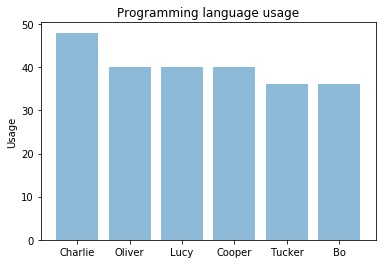

<Figure size 28800x28800 with 0 Axes>

In [129]:
#view the result

plt.bar(df_names['name'], df_names['count'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
plt.figure(figsize=(400,400))
plt.show()

>Charlie is the most used name

In [130]:
#view which is the highest kind of dogs predicted 
master_df['prediction'].value_counts()

golden retriever                  564
Labrador retriever                368
Pembroke                          336
Chihuahua                         268
chow                              176
pug                               172
Samoyed                           168
Pomeranian                        152
cocker spaniel                    112
malamute                          108
Chesapeake Bay retriever           80
French bulldog                     80
Siberian husky                     76
Cardigan                           72
miniature pinscher                 72
Eskimo dog                         72
Staffordshire bullterrier          68
German shepherd                    68
Rottweiler                         60
Shih Tzu                           56
beagle                             56
kuvasz                             56
Shetland sheepdog                  52
Maltese dog                        52
Great Pyrenees                     52
Lakeland terrier                   52
basset      

>golden retriever is the most dog kind in the tweets